# Mediapipe eyelid detection demo

Fits a mesh to your face and draws the eyelid landmarks of the detected face mesh on the webcam feed. For more information see this link.

In [56]:
# Let's import all the python libraries we need for this demo
import mediapipe as mp
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Reading an input image

Let's read in some images of faces to run eyelid detection. We provide some images in the yalefaces folder downloaded from the yalefaces dataset.

In [77]:
%ls yalefaces/

subject01.png  subject04.png  subject07.png  subject09.png


In [72]:
#let's read one of them
frame = cv2.imread('yalefaces/subject09.png')

### Fitting the face mesh to our image

In [73]:
mp_face_mesh = mp.solutions.face_mesh

#Enumerating parts of the face mesh which make up the eyelids
LEFT_EYE =[ 362, 382, 381, 380, 374, 373, 390, 249, 263, 466, 388, 387, 386, 385,384, 398 ]
RIGHT_EYE=[ 33, 7, 163, 144, 145, 153, 154, 155, 133, 173, 157, 158, 159, 160, 161 , 246 ] 

#retrieving the size of our input image in pixels
img_h, img_w = frame.shape[:2]

#defining some mediapipe facemesh parameters
with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
) as face_mesh:
    
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_frame)

### Drawing eyelids onto the face image

In [74]:
if results.multi_face_landmarks:
    mesh_points = np.array([np.multiply([p.x, p.y], [img_w, img_h]).astype(int) for p in results.multi_face_landmarks[0].landmark])
    cv2.polylines(frame, [mesh_points[LEFT_EYE]], True, (0,255,0), 1, cv2.LINE_AA)
    cv2.polylines(frame, [mesh_points[RIGHT_EYE]], True, (0,255,0), 1, cv2.LINE_AA)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

([], [])

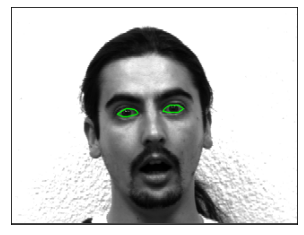

In [75]:
plt.imshow(rgb_frame)
plt.xticks([])
plt.yticks([])

Change the input face to another file and run the code again.

#### Optional: Use wget to download a face image of your choice and run mediapipe eyelid detection